### Few required Libraries

In [ ]:
!pip install texthero
pip install "gensim==3.8.1"
!pip install plotly

In [64]:
!pip install -U textblob
!python -m textblob.download_corpora

     |████████████████████████████████| 636 kB 4.9 MB/s eta 0:00:01
[nltk_data] Downloading package brown to /home/wot-param/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/wot-param/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/wot-
[nltk_data]     param/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/wot-param/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /home/wot-
[nltk_data]     param/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /home/wot-
[nltk_data]     param/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [65]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import texthero as hero
from textblob import TextBlob

### Reading csv file

In [4]:
data = pd.read_csv('dataframe.csv')

### Data cleaning

In [ ]:
#reamoving unwonted column from DataFrame
del data['Unnamed: 0']
del data['Unnamed: 4']

In [55]:
'''This is to clear unwanted part from Tags column'''
tags_list_clean = []
for tag in data['Tags']:
    tag = str(tag).replace('Tags:','')
    tags_list_clean.append(tag)

data.drop('Tags', axis = 1, inplace = False)
data['Tags'] = tags_list_clean
data

,Quote,Author,Tags,pca,kmeans
0,world created process thinking cannot changed ...,albert einstein,change deep-thoughts thinking world,"[0.029891759375712253, -0.03101607457019294]",4
1,choices harry show truly far abilities,j k rowling,abilities choices,"[-0.012072204556181826, 0.022608618077992765]",4
2,two ways live life one though nothing miracle ...,albert einstein,inspirational life live miracle miracles,"[-0.08184430771595842, 0.05056457074771066]",1
3,person gentleman lady pleasure good novel must...,jane austen,aliteracy books classic humor,"[0.046627633207523826, 0.041683150599754755]",4
4,imperfection beauty madness genius better abso...,marilyn monroe,be-yourself inspirational,"[-0.019878091493884555, 0.016521215951605217]",0
...,...,...,...,...,...
103,takes courage grow become really,e e cummings,courage,"[0.003081290744562526, -0.002898618965824618]",4
104,better get hurt truth comforted lie,khaled hosseini,life,"[0.01570464438304303, 0.029184483256878845]",1
105,never really understand person consider things...,harper lee,better-life-empathy,"[-0.02448001896219225, 0.047448156981894744]",3
106,write book wants written book difficult grown ...,madeleine l engle,books children difficult grown-ups write writ...,"[-0.10517620278436092, -0.08976704770375402]",2


In [57]:
'''below instruction runs following seven functions by default when using clean():
-> fillna(s) Replace not assigned values with empty spaces.
-> lowercase(s) Lowercase all text.
-> remove_digits() Remove all blocks of digits.
-> remove_punctuation() Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).
->remove_diacritics() Remove all accents from strings.
-> remove_stopwords() Remove all stop words.
-> remove_whitespace() Remove all white space between words.
'''
data['Quote'] = hero.clean(data['Quote']) 
data['Author'] = hero.clean(data['Author']) 
data['Tags'] = hero.clean(data['Tags']) 

### Inspecting Top Words

In [58]:
tw = hero.visualization.top_words(data['Quote']).head(10)
import plotly.express as px
fig = px.bar(tw)
fig.show()

In [59]:
tw = hero.visualization.top_words(data['Author']).head(10)
import plotly.express as px
fig = px.bar(tw)
fig.show()

In [60]:
tw = hero.visualization.top_words(data['Tags']).head(10)
import plotly.express as px
fig = px.bar(tw)
fig.show()

### Constructing a Pipeline

In [21]:
#Add pca value to dataframe to use as visualization coordinates
data['pca'] = (
            data['Quote']
            .pipe(hero.tfidf)
            .pipe(hero.pca)
   )
#Add k-means cluster to dataframe 
data['kmeans'] = (
            data['Quote']
            .pipe(hero.tfidf)
            .pipe(hero.kmeans)
   )
data.head()

/home/wot-param/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect

/home/wot-param/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



,Quote,Author,Tags,pca,kmeans
0,world created process thinking cannot changed ...,albert einstein,Tags: change deep-thoughts thinking world,"[0.029891759375712253, -0.03101607457019294]",4
1,choices harry show truly far abilities,j k rowling,Tags: abilities choices,"[-0.012072204556181826, 0.022608618077992765]",4
2,two ways live life one though nothing miracle ...,albert einstein,Tags: inspirational life live miracle miracles,"[-0.08184430771595842, 0.05056457074771066]",1
3,person gentleman lady pleasure good novel must...,jane austen,Tags: aliteracy books classic humor,"[0.046627633207523826, 0.041683150599754755]",4
4,imperfection beauty madness genius better abso...,marilyn monroe,Tags: be-yourself inspirational,"[-0.019878091493884555, 0.016521215951605217]",0


In [28]:
#generate scatter plot
hero.scatterplot(data, 'pca', color = 'kmeans')
# fig = px.scatter(data['pca'])
# fig.show()

In [ ]:
data['polarity']=data['lemm
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
atized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [33]:
def getWordCloud(var_generate_from,name):
    '''A function for getting word cloud'''
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(var_generate_from)
    plt.imshow(wordcloud)
    plt.savefig("Graphs/"+str(name)+".png", format="png")
    plt.show()

### Some pre-processing for author list before passing to function

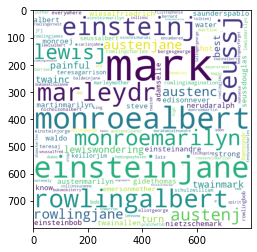

In [62]:
getWordCloud(author_list,"author_word_cloud")

## *Above Image (Word cloud) shows names of authors, Bigger the size of name shows more number of quotes has been written by individual author. 

### Some pre-processing for tag list before passing to function

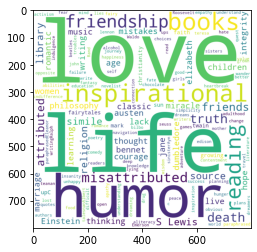

In [61]:
getWordCloud(tag_list,"tags_word_cloud")

## *Above Image (word cloud) shows names of genre, bigger the size of text shows higher the genre has in quotes. 
Here, we can see that LOVE, LIFE, and HUMAR are the most frequently occurring words for almost quote. This means that most authors has written quotes on this topics/genre.

### Histogram for No. of Quotes Vs. No. of Authors

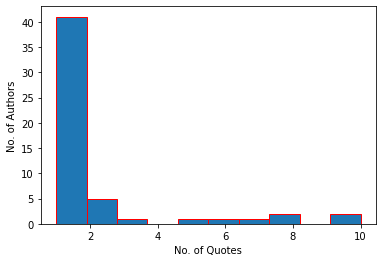

In [63]:
wordCountDf = data.groupby('Author').count()
wordCountDf = wordCountDf['Quote'].tolist()
range = (1, 10)
bins = 10
plt.hist(wordCountDf,bins,range,edgecolor='red', histtype='bar')
plt.xlabel('No. of Quotes')
plt.ylabel('No. of Authors')
plt.savefig("Graphs/Histogram_authors_count.png", format="png")
plt.show()

## *This graph shows 40 authors has written one quote only and less than 5 authors has written 10 quotes. Basically it shows there is 5 authors in this perticular dataset who have written 5 quotes.